## Visualisations Centered Around Model Outputs and the Calculated Health Index

In [8]:
import pandas as pd

# Load analysis results
analysis_results = pd.read_csv('analysis_results.csv')

# Load patient demographics data
# Replace 'path_to_patients.csv' with the actual path to your patients.csv file
patients = pd.read_csv(r'E:\DataGen\synthea\output\csv\patients.csv', usecols=['Id', 'RACE'])

# Merge analysis results with patient demographics
data = analysis_results.merge(patients, on='Id', how='left')

# Handle any missing values if necessary
data['RACE'].fillna('Unknown', inplace=True)


C:\Users\imran\AppData\Local\Temp\ipykernel_26084\2099201617.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['RACE'].fillna('Unknown', inplace=True)


analysis_results.csv contains your model outputs and cluster assignments.
patients.csv contains patient demographics, including RACE.
We merge the two datasets on the Id column to include the RACE information in our analysis.
Ensure that you replace 'path_to_patients.csv' with the correct path to your patients data.

### Visualisation 1: Distribution of Predicted Health Index by Race and Severity Index (Using Proportions)

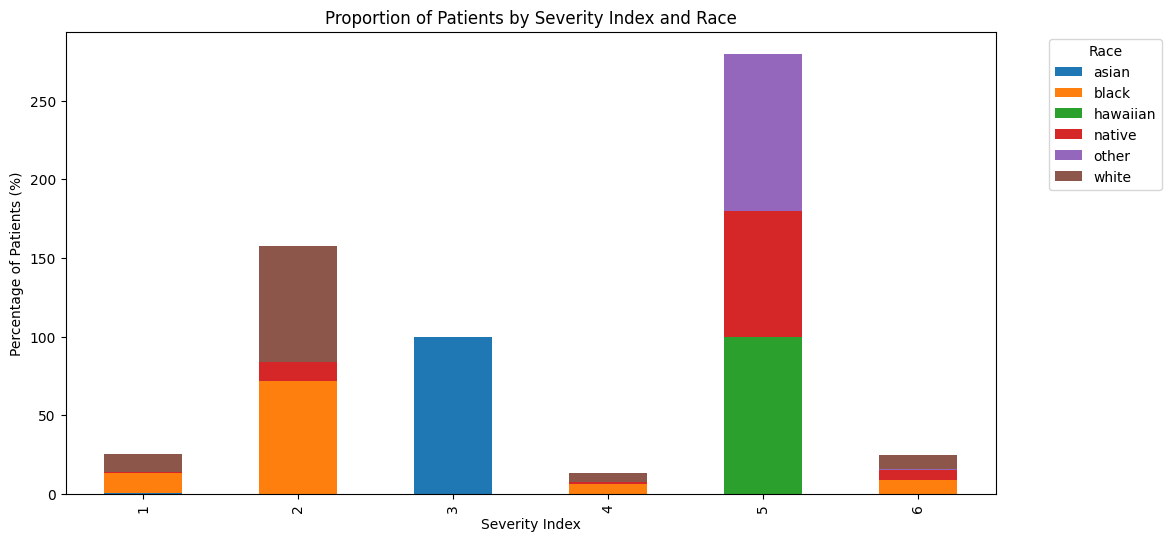

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'data' is the merged DataFrame from previous steps

# Calculate counts
group_counts = data.groupby(['Severity_Index', 'RACE']).size().reset_index(name='Count')

# Calculate total counts per race
race_totals = data['RACE'].value_counts().reset_index()
race_totals.columns = ['RACE', 'Total']

# Merge to get total counts
group_counts = group_counts.merge(race_totals, on='RACE')

# Calculate proportion
group_counts['Proportion'] = group_counts['Count'] / group_counts['Total'] * 100

# Pivot for plotting
pivot_data = group_counts.pivot(index='Severity_Index', columns='RACE', values='Proportion').fillna(0)

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proportion of Patients by Severity Index and Race')
plt.xlabel('Severity Index')
plt.ylabel('Percentage of Patients (%)')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Visualisation 2: UMAP Visualization of Latent Features (Using Stratified Sampling)

C:\Users\imran\AppData\Local\Temp\ipykernel_26084\846242482.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = data.groupby('RACE').apply(lambda x: x.sample(min_group_size, random_state=42)).reset_index(drop=True)
c:\Users\imran\miniconda3\envs\tf_gpu_env\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


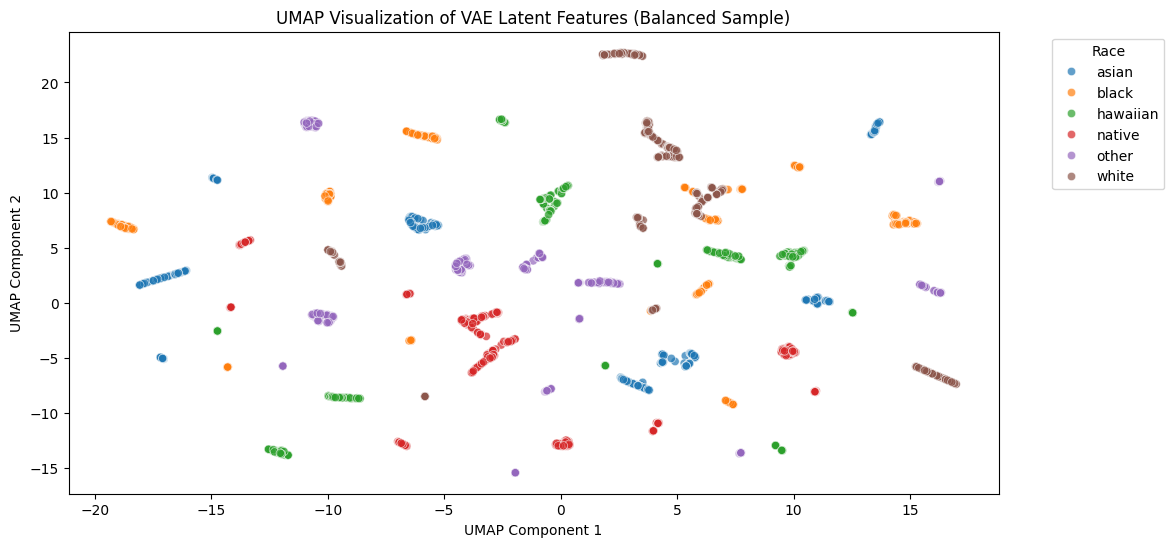

In [17]:
import numpy as np

# Determine the size of the smallest racial group
min_group_size = data['RACE'].value_counts().min()

# Create a balanced sample
balanced_data = data.groupby('RACE').apply(lambda x: x.sample(min_group_size, random_state=42)).reset_index(drop=True)

# Extract latent features
latent_features_cols = [str(i) for i in range(20)]
X_balanced = balanced_data[latent_features_cols]

# Perform UMAP
import umap.umap_ as umap
reducer = umap.UMAP(n_components=2, random_state=42)
umap_results = reducer.fit_transform(X_balanced)

# Add UMAP results to data
balanced_data['UMAP1'] = umap_results[:, 0]
balanced_data['UMAP2'] = umap_results[:, 1]

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='RACE', data=balanced_data, alpha=0.7)
plt.title('UMAP Visualization of VAE Latent Features (Balanced Sample)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Visualisation 3: Cluster Membership by Race

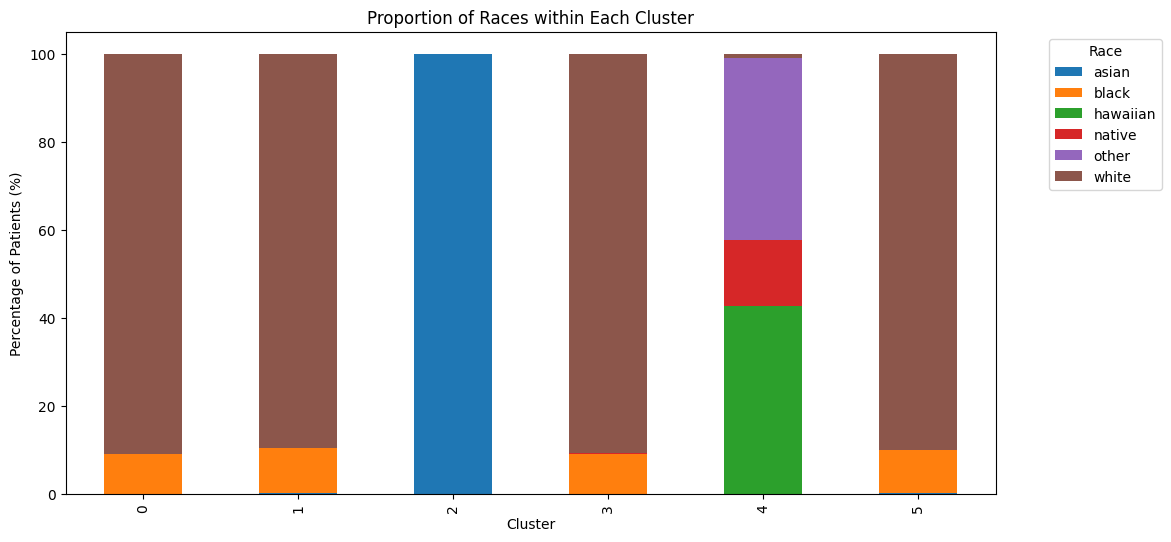

In [18]:
# Calculate counts within clusters
cluster_counts = data.groupby(['Cluster', 'RACE']).size().reset_index(name='Count')

# Calculate total counts per cluster
cluster_totals = data.groupby('Cluster').size().reset_index(name='Total')

# Merge to get total counts per cluster
cluster_counts = cluster_counts.merge(cluster_totals, on='Cluster')

# Calculate proportion
cluster_counts['Proportion'] = cluster_counts['Count'] / cluster_counts['Total'] * 100

# Pivot for plotting
pivot_data = cluster_counts.pivot(index='Cluster', columns='RACE', values='Proportion').fillna(0)

# Plot
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proportion of Races within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage of Patients (%)')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Visualisation 4: Actual vs. Predicted Health Index Colored by Race

C:\Users\imran\AppData\Local\Temp\ipykernel_26084\2324257497.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = data.groupby('RACE').apply(lambda x: x.sample(min_group_size, random_state=42)).reset_index(drop=True)


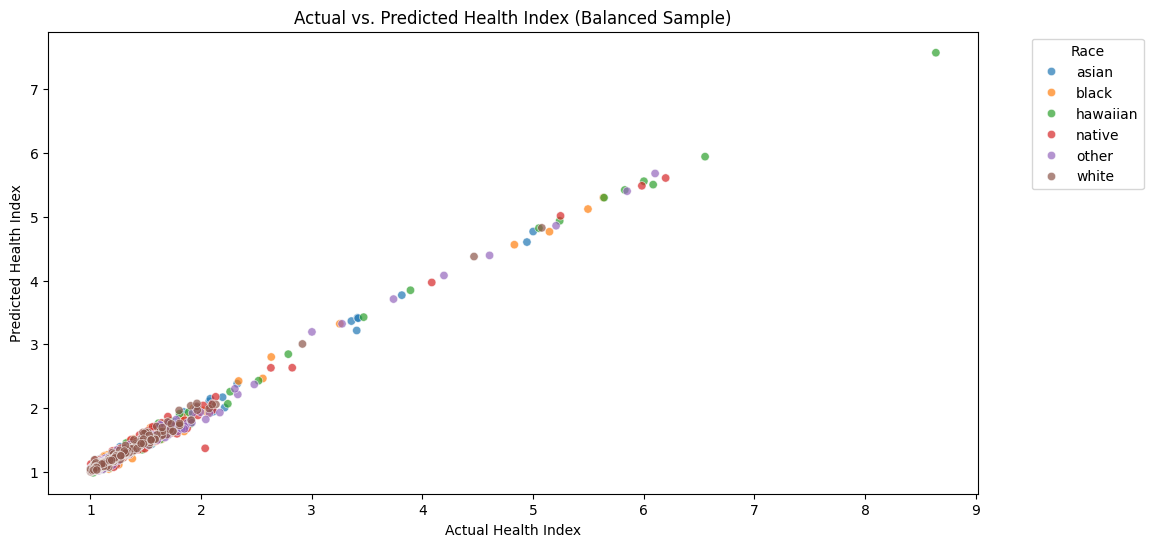

In [19]:
# Merge data (as previously prepared)
# data includes 'Health_Index', 'Predicted_Health_Index', 'RACE'

# Balance the dataset
min_group_size = data['RACE'].value_counts().min()
balanced_data = data.groupby('RACE').apply(lambda x: x.sample(min_group_size, random_state=42)).reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Health_Index', y='Predicted_Health_Index', hue='RACE', data=balanced_data, alpha=0.7)
plt.title('Actual vs. Predicted Health Index (Balanced Sample)')
plt.xlabel('Actual Health Index')
plt.ylabel('Predicted Health Index')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Visualisation 5: Severity Index Distribution by Race (Using Rates per 1,000 Patients)

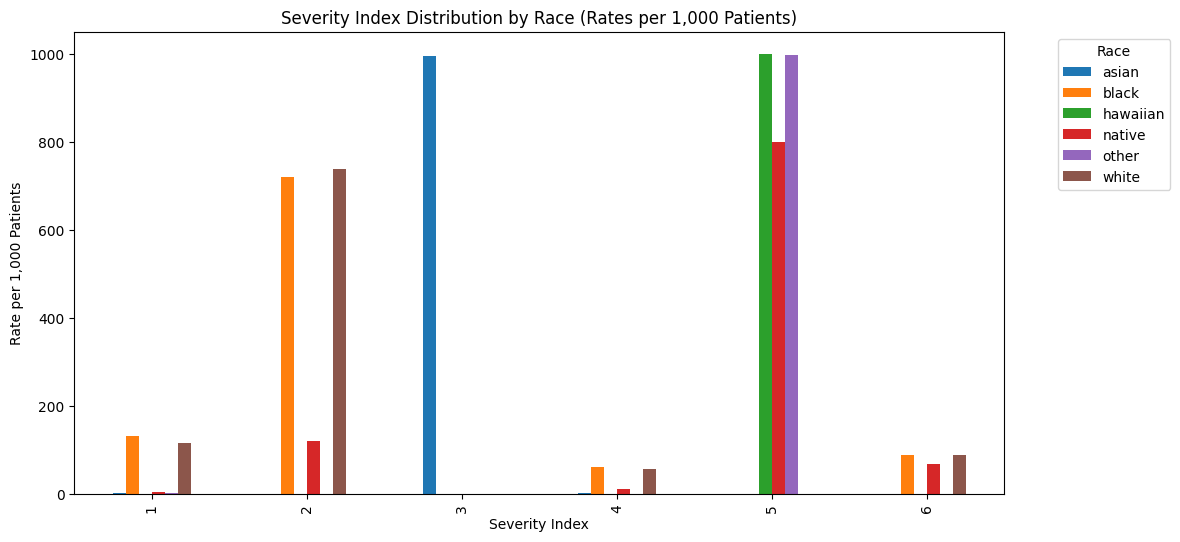

In [20]:
# Calculate counts
severity_counts = data.groupby(['RACE', 'Severity_Index']).size().reset_index(name='Count')

# Calculate total counts per race
race_totals = data['RACE'].value_counts().reset_index()
race_totals.columns = ['RACE', 'Total']

# Merge to get total counts
severity_counts = severity_counts.merge(race_totals, on='RACE')

# Calculate rates per 1,000 patients
severity_counts['Rate_per_1000'] = severity_counts['Count'] / severity_counts['Total'] * 1000

# Pivot for plotting
pivot_data = severity_counts.pivot(index='Severity_Index', columns='RACE', values='Rate_per_1000').fillna(0)

# Plot
pivot_data.plot(kind='bar', figsize=(12, 6))
plt.title('Severity Index Distribution by Race (Rates per 1,000 Patients)')
plt.xlabel('Severity Index')
plt.ylabel('Rate per 1,000 Patients')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Additional Visualisation: Health Index Distribution by Cluster (Severity Index)

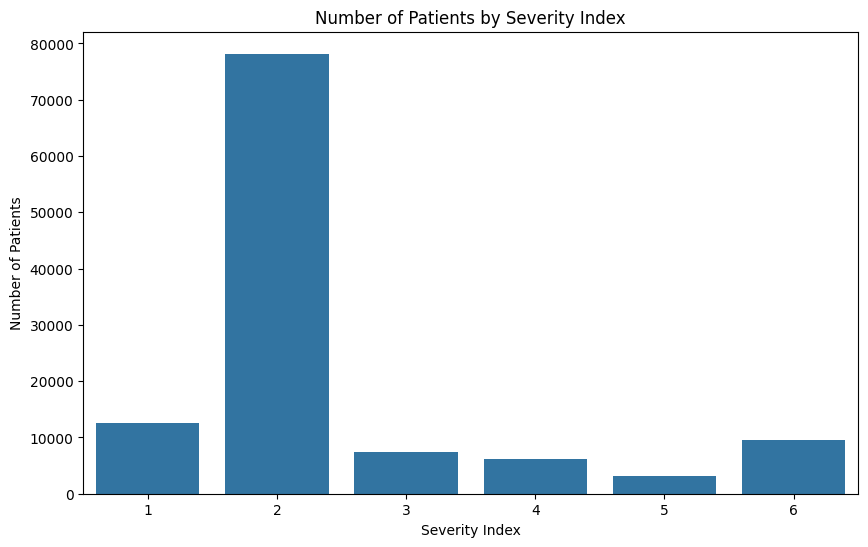

In [14]:
# Load analysis results
analysis_results = pd.read_csv('analysis_results.csv')

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity_Index', data=analysis_results)
plt.title('Number of Patients by Severity Index')
plt.xlabel('Severity Index')
plt.ylabel('Number of Patients')
plt.show()


In [15]:
race_counts = patients['RACE'].value_counts()
print(race_counts)

RACE
white       96422
black        9724
asian        7435
hawaiian     1351
other        1314
native        596
Name: count, dtype: int64
